In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('./data/building_year.xlsx')
df.head()

c:\Annaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),주택종류별(1),2024,2024.1,2024.2,2024.3,2024.4,2024.5,2024.6,...,2024.11,2024.12,2024.13,2024.14,2024.15,2024.16,2024.17,2024.18,2024.19,2024.20
0,자치구별(1),자치구별(2),주택종류별(1),합계,2024년,2023년,2022년,2021년,2020년,2019년,...,2014년,2013년,2012년,2011년,2010년,2005~2009년,2000~2004년,1990~1999년,1980~1989년,1979년 이전
1,서울시,소계,계,3170332,22637,55706,53345,70637,75647,80770,...,81419,62773,67097,67822,49817,297945,585303,786696,376088,137995
2,NaN,NaN,단독주택,286542,280,562,790,877,945,1218,...,1206,1059,1294,1266,1356,4984,12254,111955,57116,81199
3,NaN,NaN,아파트,1906060,17155,41963,31782,46321,51177,51545,...,46092,28659,28091,41220,33698,236346,371095,473937,234993,44057
4,NaN,NaN,연립주택,110623,887,1218,1140,1215,939,969,...,907,1087,1165,667,376,3268,10367,48880,30972,3875


In [3]:
print(df)

     자치구별(1)  자치구별(2)    주택종류별(1)     2024 2024.1 2024.2 2024.3 2024.4 2024.5  \
0    자치구별(1)  자치구별(2)    주택종류별(1)       합계  2024년  2023년  2022년  2021년  2020년   
1        서울시       소계           계  3170332  22637  55706  53345  70637  75647   
2        NaN      NaN        단독주택   286542    280    562    790    877    945   
3        NaN      NaN         아파트  1906060  17155  41963  31782  46321  51177   
4        NaN      NaN        연립주택   110623    887   1218   1140   1215    939   
..       ...      ...         ...      ...    ...    ...    ...    ...    ...   
152      NaN      NaN        단독주택     9362     18     31     46     41     37   
153      NaN      NaN         아파트   101647   3686   2386   1135   7576   6908   
154      NaN      NaN        연립주택     3377    127     53     56     63     37   
155      NaN      NaN       다세대주택    39881    243    708   1339   1330   1654   
156      NaN      NaN  비주거용 건물내주택     1045      5      5      6     16     11   

    2024.6  ... 2024.11 202

In [4]:
# 2. 병합된 셀(NaN)을 이전 값으로 채우기 (Forward Fill)
df['자치구별(1)'] = df['자치구별(1)'].ffill()
df['자치구별(2)'] = df['자치구별(2)'].ffill()

# 3. 컬럼명 직관적으로 변경
df.rename(columns={'자치구별(1)': '시', '자치구별(2)': '구', '주택종류별(1)': '주택유형'}, inplace=True)

# 4. 숫자 데이터 정제 ('X' -> 0, 콤마 제거) 및 정수 변환
# 4번째 컬럼부터 끝까지가 수치 데이터임
num_cols = df.columns[3:]
for col in num_cols:
    df[col] = df[col].astype(str).str.replace('X', '0').str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# 5. (선택) 분석하기 좋은 Long Format으로 변환
df_long = df.melt(id_vars=['시', '구', '주택유형'], var_name='건축년도', value_name='호수')

# 결과 확인
print(df.head())

         시        구      주택유형     2024  2024.1  2024.2  2024.3  2024.4  \
0  자치구별(1)  자치구별(2)  주택종류별(1)        0       0       0       0       0   
1      서울시       소계         계  3170332   22637   55706   53345   70637   
2      서울시       소계      단독주택   286542     280     562     790     877   
3      서울시       소계       아파트  1906060   17155   41963   31782   46321   
4      서울시       소계      연립주택   110623     887    1218    1140    1215   

   2024.5  2024.6  ...  2024.11  2024.12  2024.13  2024.14  2024.15  2024.16  \
0       0       0  ...        0        0        0        0        0        0   
1   75647   80770  ...    81419    62773    67097    67822    49817   297945   
2     945    1218  ...     1206     1059     1294     1266     1356     4984   
3   51177   51545  ...    46092    28659    28091    41220    33698   236346   
4     939     969  ...      907     1087     1165      667      376     3268   

   2024.17  2024.18  2024.19  2024.20  
0        0        0        0      

In [6]:


# 1. 데이터 불러오기
# 원본 엑셀의 구조상 2번째 행(index 1)이 실제 헤더이므로 header=1로 설정합니다.
file_path = './data/building_year.xlsx'
df = pd.read_excel(file_path, header=1)

# 2. 전처리: 병합된 셀(NaN) 채우기 및 컬럼명 변경
# 엑셀의 병합된 셀은 CSV 로드시 NaN이 되므로 바로 윗값으로 채웁니다(ffill).
df['자치구별(1)'] = df['자치구별(1)'].ffill()
df['자치구별(2)'] = df['자치구별(2)'].ffill()
df.rename(columns={'자치구별(1)': '시', '자치구별(2)': '구', '주택종류별(1)': '주택유형'}, inplace=True)

# 3. 데이터 정제 (숫자 변환)
# 연도별 컬럼들은 4번째 컬럼(index 3)부터 시작합니다.
# 'X'는 0으로 변환하고, 쉼표(,)를 제거한 뒤 정수형으로 변환합니다.
num_cols = df.columns[3:]
for col in num_cols:
    df[col] = df[col].astype(str).str.replace('X', '0').str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# 4. 10년 단위 그룹핑 정의
# 원본 컬럼명들을 원하는 10년 단위 그룹 리스트로 매핑합니다.
col_groups = {
    '2020~': ['2024년', '2023년', '2022년', '2021년', '2020년'],
    '2010~2019': ['2019년', '2018년', '2017년', '2016년', '2015년', 
                  '2014년', '2013년', '2012년', '2011년', '2010년'],
    '2000~2009': ['2005~2009년', '2000~2004년'],
    '1990~1999': ['1990~1999년'],
    '1980~1989': ['1980~1989년'],
    '~1979': ['1979년 이전']
}

# 5. 그룹별 합계 계산
# 기본 정보(시, 구, 주택유형)를 가진 새 데이터프레임을 만듭니다.
df_decade = df[['시', '구', '주택유형']].copy()

for group_name, cols in col_groups.items():
    # 데이터에 실제 존재하는 컬럼만 골라냅니다 (에러 방지)
    valid_cols = [c for c in cols if c in df.columns]
    # 해당 그룹의 컬럼들을 가로 방향(axis=1)으로 더합니다.
    df_decade[group_name] = df[valid_cols].sum(axis=1)

# 6. 결과 확인 및 저장
print(df_decade.head())
df_decade.to_csv('./results/building_year_decades.csv', index=False, encoding='utf-8-sig')

     시   구   주택유형   2020~  2010~2019  2000~2009  1990~1999  1980~1989   ~1979
0  서울시  소계      계  277972     708333     883248     786696     376088  137995
1  서울시  소계   단독주택    3454      15580      17238     111955      57116   81199
2  서울시  소계    아파트  188398     357234     607441     473937     234993   44057
3  서울시  소계   연립주택    5399       7862      13635      48880      30972    3875
4  서울시  소계  다세대주택   80002     324620     241459     142911      45873    5036


c:\Annaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
df = pd.read_csv('./results/building_year_decades.csv')


In [8]:
# 구별 그룹화 및 1989년 이전 건물 비율 분석
# 주택유형별로 행이 나뉘어 있으므로, 구별로만 그룹화하여 집계

# 1. 구별 합계 계산
df_gu = df.groupby('구').agg({
    '~1979': 'sum',
    '1980~1989': 'sum',
    '1990~1999': 'sum',
    '2000~2009': 'sum',
    '2010~2019': 'sum',
    '2020~': 'sum'
}).reset_index()

# 2. 전체 건축물 수 계산
df_gu['전체'] = df_gu['~1979'] + df_gu['1980~1989'] + df_gu['1990~1999'] + \
                 df_gu['2000~2009'] + df_gu['2010~2019'] + df_gu['2020~']

# 3. 1989년 이전(~1979 + 1980~1989) 건물 수와 비율 계산
df_gu['1989년이전'] = df_gu['~1979'] + df_gu['1980~1989']
df_gu['1989년이전비율(%)'] = (df_gu['1989년이전'] / df_gu['전체'] * 100).round(2)

# 4. 결과 출력 (구, 1989년 이전 건물 수, 비율)
result_df = df_gu[['구', '1989년이전', '전체', '1989년이전비율(%)']]
result_df.columns = ['구', '1989년이전건물수', '전체건물수', '1989년이전비율(%)']

print("=" * 70)
print("구별 1989년 이전 건축물 현황")
print("=" * 70)
print(result_df.to_string(index=False))
print("=" * 70)

# 5. 통계 요약
print("\n[통계 요약]")
print(f"평균 1989년이전 비율: {result_df['1989년이전비율(%)'].mean():.2f}%")
print(f"최고 비율 구: {result_df.loc[result_df['1989년이전비율(%)'].idxmax(), '구']} ({result_df['1989년이전비율(%)'].max():.2f}%)")
print(f"최저 비율 구: {result_df.loc[result_df['1989년이전비율(%)'].idxmin(), '구']} ({result_df['1989년이전비율(%)'].min():.2f}%)")

# 6. CSV로 저장
result_df.to_csv('./results/building_year_by_gu.csv', index=False, encoding='utf-8-sig')
print("\n✓ 결과 저장: ./results/building_year_by_gu.csv")


구별 1989년 이전 건축물 현황
   구  1989년이전건물수   전체건물수  1989년이전비율(%)
 강남구       76010  384437         19.77
 강동구       39658  310620         12.77
 강북구       29360  203587         14.42
 강서구       19112  408707          4.68
 관악구       29330  261974         11.20
 광진구       27776  191248         14.52
 구로구       45056  275889         16.33
 금천구       21870  145320         15.05
 노원구      126722  385594         32.86
 도봉구       46048  219268         21.00
동대문구       31604  221514         14.27
 동작구       25164  241975         10.40
 마포구       28904  258850         11.17
서대문구       31120  212605         14.64
 서초구       39020  269124         14.50
 성동구       24266  182445         13.30
 성북구       33038  287509         11.49
  소계     1028166 6340664         16.22
 송파구       85068  445569         19.09
 양천구       84488  295336         28.61
영등포구       51842  230020         22.54
 용산구       40542  156108         25.97
 은평구       30836  327511          9.42
 종로구       23568   94304         24.99
  중구  

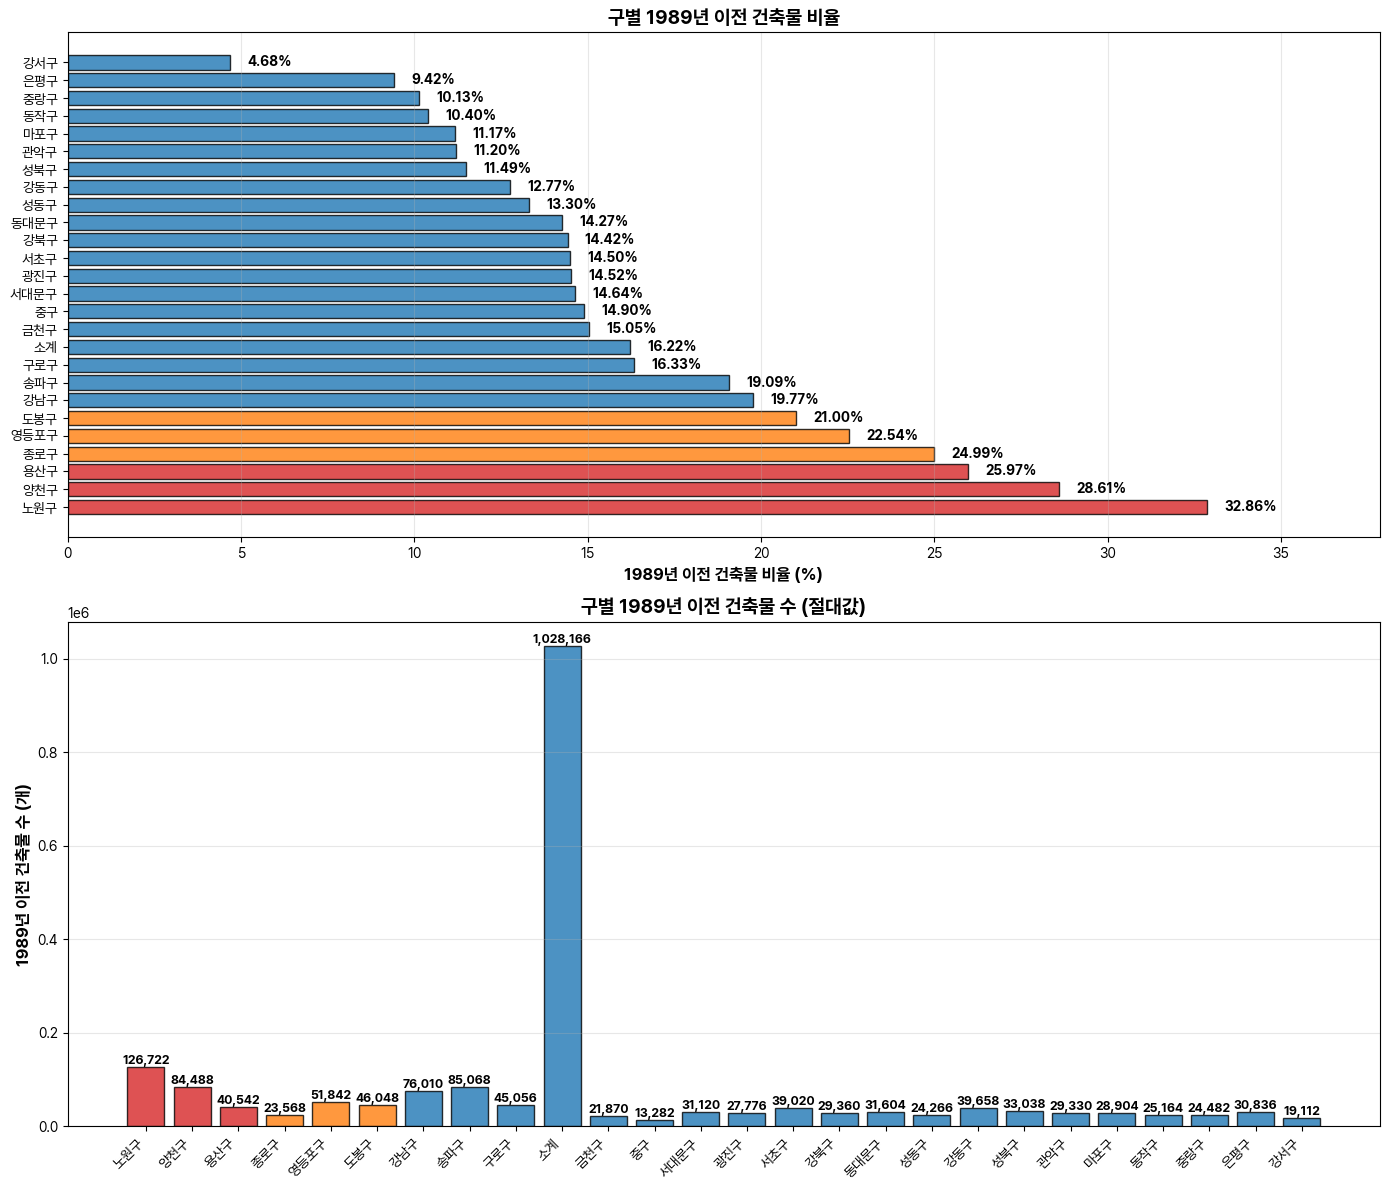

✓ 차트 저장: ./results/building_year_by_gu_visualization.png


In [10]:
# 시각화 1: 구별 1989년 이전 건축물 비율 - 막대 차트
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 데이터 정렬 (비율 기준 내림차순)
result_sorted = result_df.sort_values('1989년이전비율(%)', ascending=False)

# 1-1. 가로 막대 차트 (비율 중심)
ax1 = axes[0]
colors = ['#d62728' if x > 25 else '#ff7f0e' if x > 20 else '#1f77b4' for x in result_sorted['1989년이전비율(%)']]
bars1 = ax1.barh(result_sorted['구'], result_sorted['1989년이전비율(%)'], color=colors, alpha=0.8, edgecolor='black')

# 값 표시
for i, (bar, val) in enumerate(zip(bars1, result_sorted['1989년이전비율(%)'])):
    ax1.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.2f}%', 
             va='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('1989년 이전 건축물 비율 (%)', fontsize=12, fontweight='bold')
ax1.set_title('구별 1989년 이전 건축물 비율', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.set_xlim(0, max(result_sorted['1989년이전비율(%)']) + 5)

# 1-2. 절대값 비교 (세로 막대 차트)
ax2 = axes[1]
x_pos = range(len(result_sorted))
bars2 = ax2.bar(x_pos, result_sorted['1989년이전건물수'], color=colors, alpha=0.8, edgecolor='black')

# 값 표시
for bar, val in zip(bars2, result_sorted['1989년이전건물수']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height, f'{int(val):,}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_xticks(x_pos)
ax2.set_xticklabels(result_sorted['구'], rotation=45, ha='right')
ax2.set_ylabel('1989년 이전 건축물 수 (개)', fontsize=12, fontweight='bold')
ax2.set_title('구별 1989년 이전 건축물 수 (절대값)', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('./results/building_year_by_gu_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 차트 저장: ./results/building_year_by_gu_visualization.png")


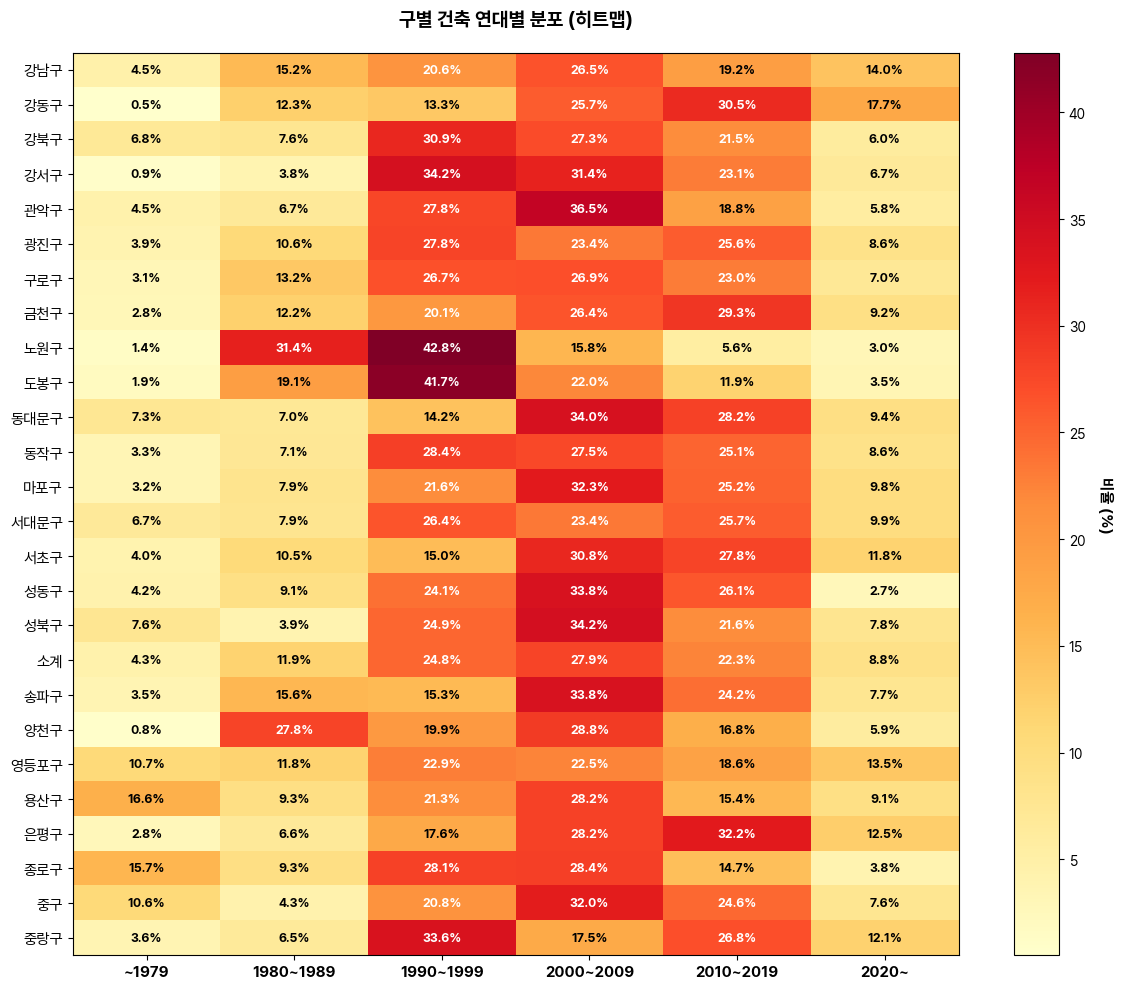

✓ 히트맵 저장: ./results/building_year_heatmap.png


In [11]:
# 시각화 2: 히트맵 - 구별 건축 연대별 분포
# 결과 데이터를 기반으로 연대별 비율 계산

df_gu_ratio = df_gu.copy()

# 각 연대별 비율 계산 (%)
for era in ['~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019', '2020~']:
    df_gu_ratio[f'{era}_비율'] = (df_gu_ratio[era] / df_gu_ratio['전체'] * 100).round(2)

# 히트맵용 데이터 준비
heatmap_data = df_gu_ratio[['구', '~1979_비율', '1980~1989_비율', '1990~1999_비율', 
                             '2000~2009_비율', '2010~2019_비율', '2020~_비율']].set_index('구')
heatmap_data.columns = ['~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019', '2020~']

# 히트맵 시각화
fig, ax = plt.subplots(figsize=(12, 10))

# 히트맵 생성
im = ax.imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')

# 축 설정
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_yticks(range(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns, fontsize=11, fontweight='bold')
ax.set_yticklabels(heatmap_data.index, fontsize=11)

# 텍스트 추가 (각 셀에 값 표시)
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.values[i, j]
        text = ax.text(j, i, f'{value:.1f}%', 
                      ha="center", va="center", color="black" if value < 20 else "white",
                      fontsize=9, fontweight='bold')

# 컬러바 추가
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('비율 (%)', rotation=270, labelpad=20, fontsize=11, fontweight='bold')

ax.set_title('구별 건축 연대별 분포 (히트맵)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('./results/building_year_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 히트맵 저장: ./results/building_year_heatmap.png")


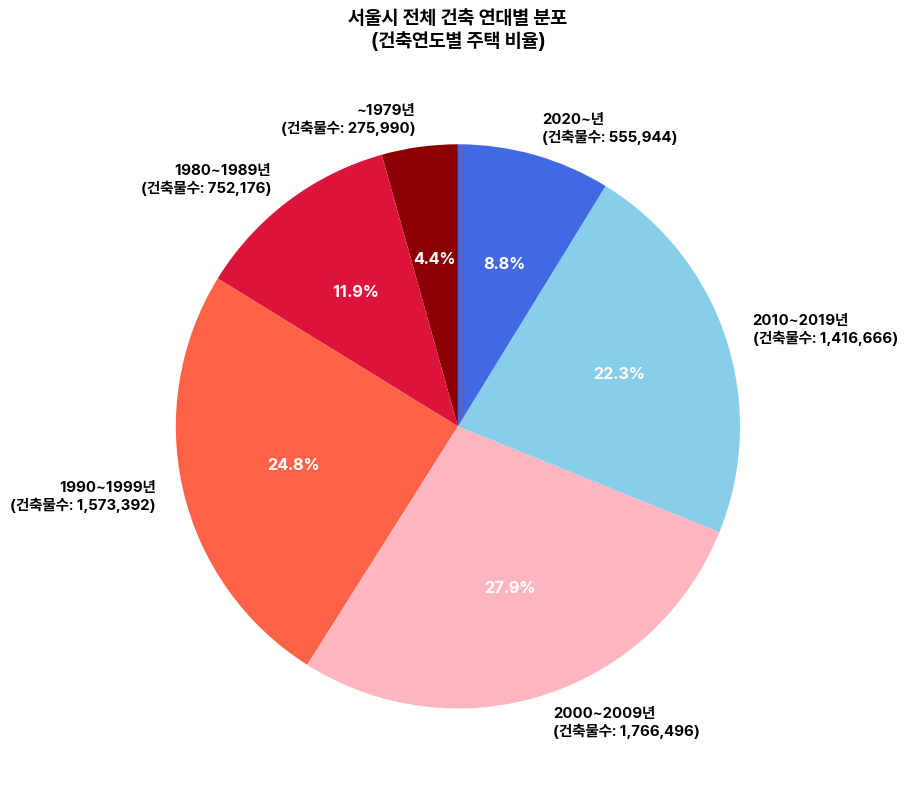

✓ 원형 차트 저장: ./results/building_year_pie.png


In [12]:
# 시각화 3: 원형 차트 - 전체 서울시 건축 연대별 분포
# 전체 ('소계') 행의 데이터 사용

total_row = df_gu[df_gu['구'] == '소계'].iloc[0]
eras = ['~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019', '2020~']
era_counts = [total_row[era] for era in eras]
era_labels = ['~1979년\n(건축물수: {:,})'.format(int(total_row['~1979'])),
              '1980~1989년\n(건축물수: {:,})'.format(int(total_row['1980~1989'])),
              '1990~1999년\n(건축물수: {:,})'.format(int(total_row['1990~1999'])),
              '2000~2009년\n(건축물수: {:,})'.format(int(total_row['2000~2009'])),
              '2010~2019년\n(건축물수: {:,})'.format(int(total_row['2010~2019'])),
              '2020~년\n(건축물수: {:,})'.format(int(total_row['2020~']))]

colors_pie = ['#8B0000', '#DC143C', '#FF6347', '#FFB6C1', '#87CEEB', '#4169E1']

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(era_counts, labels=era_labels, autopct='%1.1f%%',
                                     colors=colors_pie, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})

# 자동 텍스트(%) 스타일 조정
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax.set_title('서울시 전체 건축 연대별 분포\n(건축연도별 주택 비율)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('./results/building_year_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 원형 차트 저장: ./results/building_year_pie.png")
